AxesSubplot(0.125,0.125;0.775x0.755)
Team A - Effective Field Goal Percentages by Zone
ShotType
2PT    0.400000
C3     0.600000
NC3    0.483333
Name: eFG, dtype: float64
          
          
Team B- Effective Field Goal Percentages by Zone
ShotType
2PT    0.460123
C3     0.357143
NC3    0.546875
Name: eFG, dtype: float64
          
          
Team A - Distribtion of Shots
2PT    0.607143
NC3    0.321429
C3     0.071429
Name: ShotType, dtype: float64


Team B - Distribtion of Shots
2PT    0.582143
NC3    0.342857
C3     0.075000
Name: ShotType, dtype: float64


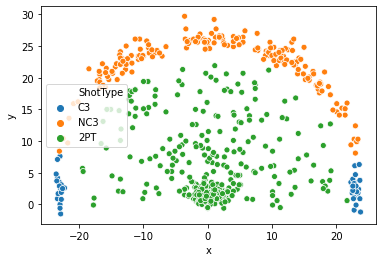

In [1]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('shots_data.csv')


# functions for shot locations and made 3 pointers 
def zone_classify(row):
    if (row['x'] > 22.0 or row['x'] < -22.0) and (row['y'] <= 7.8):
        return "C3"
    elif ((row['x'])**2) + ((row['y'])**2) > 552.25:
        return "NC3"
    else:
        return "2PT"

def made_3PT (row):
    if row['fgmade'] == 1 and row['ShotType'] != '2PT':
        return 1
    else:
        return 0 
    
df['ShotType'] = df.apply(zone_classify,axis=1)
df['Made3'] = df.apply(made_3PT, axis=1)
df['Shot'] = 1
df['eFG'] = (df['fgmade'] + (.5 * df['Made3']))/(df['Shot'])

print(sns.scatterplot(df['x'],df['y'],hue=df['ShotType']))

team_a = df[df['team'] == 'Team A']
team_b = df[df['team'] == 'Team B']

print("Team A - Effective Field Goal Percentages by Zone")
print(team_a.groupby('ShotType')['eFG'].mean())
print("          ")
print("          ")

print("Team B- Effective Field Goal Percentages by Zone")
print(team_b.groupby('ShotType')['eFG'].mean())
print("          ")
print("          ")
print("Team A - Distribtion of Shots")
print(team_a['ShotType'].value_counts(normalize=True))
print("")
print("")

print("Team B - Distribtion of Shots")
print(team_b['ShotType'].value_counts(normalize=True))